In [4]:
import numpy as np 
import math
# data processing
import pandas as pd 

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import tree

#Varrible selection
from statsmodels.graphics.correlation import plot_corr
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import GridSearchCV

In [5]:
# the csv files are converted to panda dataframe and are renamed.
Train_df= pd.read_csv(r"C:\Users\27833\Downloads\Train.csv")
Test_df= (pd.read_csv(r"C:\Users\27833\Downloads\Test.csv"))
Riders_df= pd.read_csv(r"C:\Users\27833\Downloads\Riders.csv")
VariableDefinitions_df= pd.read_csv(r"C:\Users\27833\Downloads\VariableDefinitions.csv")
SampleSubmission_df= pd.read_csv(r"C:\Users\27833\Downloads\SampleSubmission.csv")

In [6]:
    #Joining the riders to both Train and Test data set
Train_df = pd.merge(Train_df, Riders_df, left_on='Rider Id', 
                    right_on='Rider Id', how='left')
Test_df = pd.merge(Test_df, Riders_df, left_on='Rider Id',
                    right_on='Rider Id', how='left')

In [7]:
    # Formatting the naming of the columns
Train_df.columns = Train_df.columns.str.replace(' ', '_')
Test_df.columns = Test_df .columns.str.replace(' ', '_')

    #removing "-" from the feature labels.
Train_df.columns = Train_df.columns.str.replace('_-_', '_')
Test_df.columns = Test_df .columns.str.replace('_-_', '_')

In [8]:
Train_df = Train_df.drop(['Vehicle_Type', 
                          'Arrival_at_Destination_Day_of_Month',
                          'Arrival_at_Destination_Weekday_(Mo_=_1)',
                          'Arrival_at_Destination_Time'], axis = 1)
Test_df = Test_df.drop(['Vehicle_Type'], axis = 1)

In [9]:
    #replacing NAN with 0 for precipitation feature
Train_df["Precipitation_in_millimeters"] = Train_df["Precipitation_in_millimeters"].fillna(0)
Test_df["Precipitation_in_millimeters"] = Test_df["Precipitation_in_millimeters"].fillna(0)

In [10]:
    #repacing the missing temparature with the mean
Train_df = Train_df.fillna(Train_df.mean())
Test_df = Test_df.fillna(Test_df.mean())

In [16]:
def alter_time(df):
    time_matrix = ['Placement_Time','Confirmation_Time', 
                   'Arrival_at_Pickup_Time', 'Pickup_Time']
    for i in time_matrix:
        df[i] = pd.to_datetime(df[i]).dt.strftime('%H:%M:%S')
        df[i] = pd.to_timedelta(df[i])
        df[i] = df[i].dt.total_seconds()
        
    return df

In [17]:
Train_df = alter_time(Train_df)
Test_df = alter_time(Test_df)

## Time Engineered to Represent Circular Format 

In [13]:
Train_df.head()

,Order_No,User_Id,Platform_Type,Personal_or_Business,Placement_Day_of_Month,Placement_Weekday_(Mo_=_1),Placement_Time,Confirmation_Day_of_Month,Confirmation_Weekday_(Mo_=_1),Confirmation_Time,...,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,3,Business,9,5,34546.0,9,5,34810.0,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_25375,User_Id_2285,3,Personal,12,5,40576.0,12,5,41001.0,...,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,396,339,13.6,69
2,Order_No_1899,User_Id_265,3,Business,30,2,45565.0,30,2,45764.0,...,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,1023,242,12.5,114
3,Order_No_9336,User_Id_1402,3,Business,15,5,33934.0,15,5,33965.0,...,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,886,283,14.5,113
4,Order_No_27883,User_Id_1737,1,Personal,13,1,35718.0,13,1,35778.0,...,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,2311,872,14.1,533


In [14]:
# split dataset into train and test sets
Ix_train, Ix_test, Iy_train, Iy_test = train_test_split(Train_df,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=1,
                                                    shuffle=False)

NameError: name 'train_test_split' is not defined

In [ ]:
Ix_test.head()

In [ ]:
 #categorical data (all id and order numbers)


In [ ]:
Train_df = Train_df.drop(['Order_No', 'User_Id', 'Rider_Id'], axis = 1)

In [ ]:
Train_df.head(2)

## Encoding Personal or Business

In [547]:
#Encoding personal or business as it is shown to influence y-prediction

,Platform_Type,Placement_Day_of_Month,Placement_Weekday_Mo_1,Placement_Time,Confirmation_Day_of_Month,Confirmation_Weekday_Mo_1,Confirmation_Time,Arrival_at_Pickup_Day_of_Month,Arrival_at_Pickup_Weekday_Mo_1,Arrival_at_Pickup_Time,...,Pickup_Long,Destination_Lat,Destination_Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Personal_or_Business_Business,Personal_or_Business_Personal,Time_from_Pickup_to_Arrival
0,3,9,5,34546.0,9,5,34810.0,9,5,36287.0,...,36.830370,-1.300406,36.829741,1637,1309,13.8,549,1,0,745
1,3,12,5,40576.0,12,5,41001.0,12,5,42022.0,...,36.899315,-1.295004,36.814358,396,339,13.6,69,0,1,1993
2,3,30,2,45565.0,30,2,45764.0,30,2,46174.0,...,36.843419,-1.300921,36.828195,1023,242,12.5,114,1,0,455
3,3,15,5,33934.0,15,5,33965.0,15,5,34676.0,...,36.832396,-1.257147,36.795063,886,283,14.5,113,1,0,1341
4,1,13,1,35718.0,13,1,35778.0,13,1,36233.0,...,36.792118,-1.295041,36.809817,2311,872,14.1,533,0,1,1214


,Platform_Type,Placement_Day_of_Month,Placement_Weekday_(Mo_=_1),Placement_Time,Confirmation_Day_of_Month,Confirmation_Weekday_(Mo_=_1),Confirmation_Time,Arrival_at_Pickup_Day_of_Month,Arrival_at_Pickup_Weekday_(Mo_=_1),Arrival_at_Pickup_Time,...,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Time_from_Pickup_to_Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Personal_or_Business_Personal
0,3,9,5,34546.0,9,5,34810.0,9,5,36287.0,...,-1.317755,36.830370,-1.300406,36.829741,745,1637,1309,13.8,549,0
1,3,12,5,40576.0,12,5,41001.0,12,5,42022.0,...,-1.351453,36.899315,-1.295004,36.814358,1993,396,339,13.6,69,1


In [18]:
def sincos_time(Train_df):
    seconds_in_day = 24*60*60    
    time_matrix = ['Placement_Time', 'Confirmation_Time', 
                   'Arrival_at_Pickup_Time', 'Pickup_Time']
    for i in time_matrix:
        Train_df[str(i) +'sin_time'] = np.sin(2*np.pi*Train_df[i]/seconds_in_day)
        Train_df[str(i) +'cos_time'] = np.cos(2*np.pi*Train_df[i]/seconds_in_day)
        #Train_df = Train_df.drop([i], axis=1, inplace = True)
    return Train_df

In [ ]:
sincos_time(Train_df)

KeyError: 'Arrival_at_Pickup_Timesin_time'

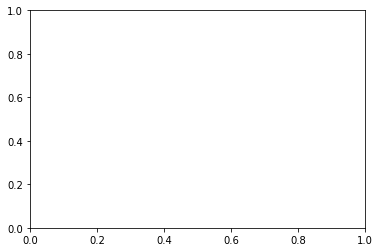

In [19]:
Train_df.plot.scatter('Arrival_at_Pickup_Timesin_time','Arrival_at_Pickup_Timecos_time', color = 'lime').set_aspect('equal')

In [553]:
df_dummies.columns

Index(['Platform_Type', 'Placement_Day_of_Month', 'Placement_Weekday_(Mo_=_1)',
       'Placement_Time', 'Confirmation_Day_of_Month',
       'Confirmation_Weekday_(Mo_=_1)', 'Confirmation_Time',
       'Arrival_at_Pickup_Day_of_Month', 'Arrival_at_Pickup_Weekday_(Mo_=_1)',
       'Arrival_at_Pickup_Time', 'Pickup_Day_of_Month',
       'Pickup_Weekday_(Mo_=_1)', 'Pickup_Time', 'Distance_(KM)',
       'Temperature', 'Precipitation_in_millimeters', 'Pickup_Lat',
       'Pickup_Long', 'Destination_Lat', 'Destination_Long',
       'Time_from_Pickup_to_Arrival', 'No_Of_Orders', 'Age', 'Average_Rating',
       'No_of_Ratings', 'Personal_or_Business_Personal',
       'Placement_Timesin_time', 'Placement_Timecos_time',
       'Confirmation_Timesin_time', 'Confirmation_Timecos_time',
       'Arrival_at_Pickup_Timesin_time', 'Arrival_at_Pickup_Timecos_time',
       'Pickup_Timesin_time', 'Pickup_Timecos_time'],
      dtype='object')

In [582]:
df_dummies = df_dummies.drop(['Placement_Time', 'Confirmation_Time', 
                   'Arrival_at_Pickup_Time', 'Pickup_Time', 'Time_from_Pickup_to_Arrival'], axis = 1)

In [583]:
df_dummies.tail(2)

,Platform_Type,Placement_Day_of_Month,Placement_Weekday_(Mo_=_1),Confirmation_Day_of_Month,Confirmation_Weekday_(Mo_=_1),Arrival_at_Pickup_Day_of_Month,Arrival_at_Pickup_Weekday_(Mo_=_1),Pickup_Day_of_Month,Pickup_Weekday_(Mo_=_1),Distance_(KM),...,No_of_Ratings,Personal_or_Business_Personal,Placement_Timesin_time,Placement_Timecos_time,Confirmation_Timesin_time,Confirmation_Timecos_time,Arrival_at_Pickup_Timesin_time,Arrival_at_Pickup_Timecos_time,Pickup_Timesin_time,Pickup_Timecos_time
21199,1,4,3,4,3,4,3,4,3,13,...,1101,1,0.603034,-0.797716,0.602221,-0.798329,0.577205,-0.816600,0.554663,-0.832075
21200,3,26,2,26,2,26,2,26,2,12,...,70,0,-0.572802,-0.819694,-0.573636,-0.819110,-0.589490,-0.807776,-0.649172,-0.760642


In [556]:
X = df_dummies.drop(["Time_from_Pickup_to_Arrival"], axis=1).values

In [557]:
y = np.array(df_dummies.loc[:,["Time_from_Pickup_to_Arrival"]])

In [558]:
y = y.reshape(len(y), 1)

In [559]:
from sklearn.preprocessing import StandardScaler

In [560]:
scaler = StandardScaler()

In [561]:
X_scaled = scaler.fit_transform(X)

In [562]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [563]:
# split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_dummies,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=1,
                                                    shuffle=False)

In [564]:
from sklearn.svm import SVR

In [574]:
def s_v_m(X_train, y_train, X_test):
    regressor = SVR(kernel = 'rbf')
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    return regressor, y_pred

In [575]:
from sklearn import preprocessing

In [579]:
model, y_pred = s_v_m(X_train, y_train, X_test)

C:\Users\27833\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [580]:
y_pred

array([1378.97774599, 1384.79312456, 1370.74058788, ..., 1386.10537308,
       1365.12179144, 1380.62374987])

In [578]:
y_pred = y_pred.reshape(len(y_pred), 1)

AttributeError: 'tuple' object has no attribute 'reshape'

In [570]:
y_pred = pd.DataFrame(data=y_pred, columns= ['Time From Pickup To Arrival'], index = Ix_test['Order_No'])
y_pred.reset_index(inplace = True)

In [571]:
y_pred

,Order_No,Time From Pickup To Arrival
0,Order_No_17313,1378.977746
1,Order_No_11495,1384.793125
2,Order_No_262,1370.740588
3,Order_No_23022,1374.443078
4,Order_No_1438,1367.829744
...,...,...
4236,Order_No_8834,1376.743980
4237,Order_No_22892,1365.913175
4238,Order_No_2831,1386.105373
4239,Order_No_6174,1365.121791


In [573]:
y_pred.to_csv('svm_timefeature')